<a href="https://colab.research.google.com/github/ajdduck/uos_linearrgression/blob/master/HW_3_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U stemgraphic

Requirement already up-to-date: stemgraphic in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import stemgraphic
import statsmodels.stats.api as sms

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Q3_4.txt', sep='\t', names=['Y', 'X1', 'X2', 'X3'])

In [4]:
df.head()

,Y,X1,X2,X3
0,20,2,20,4
1,60,4,19,5
2,46,3,27,4
3,41,2,32,1
4,12,1,24,4


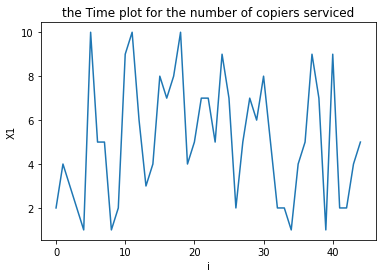

In [5]:
plt.plot(df['X1'])
plt.xlabel("i")
plt.ylabel("X1")
plt.title("the Time plot for the number of copiers serviced")
plt.show()

In [0]:
y = df['Y']
X = df['X1']

In [0]:
results = smf.ols('y ~ X', data = df).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     968.7
Date:                Sat, 23 May 2020   Prob (F-statistic):           4.01e-31
Time:                        08:14:42   Log-Likelihood:                -161.27
No. Observations:                  45   AIC:                             326.5
Df Residuals:                      43   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5802      2.804     -0.207      0.837      -6.235       5.075
X             15.0352      0.483     31.123      0.000      14.061      16.009
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.167
Skew:                          -0.388   Prob(JB):                        0.558
Kurtosis:                       2.853   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
results_residual = results.resid

(<Figure size 540x756 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f87e7536b70>)

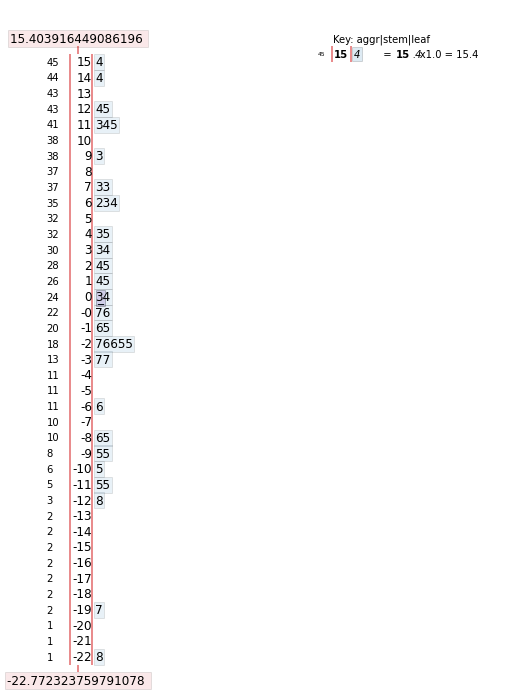

In [10]:
stemgraphic.stem_graphic(results_residual)

In [0]:
results_fitted_value = results.fittedvalues

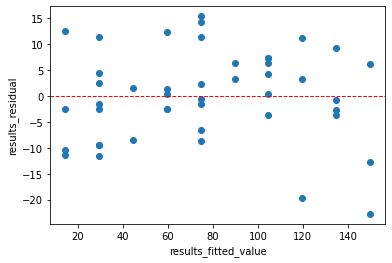

In [12]:
plt.scatter(results_fitted_value, results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("results_fitted_value")
plt.ylabel("results_residual")
plt.show()

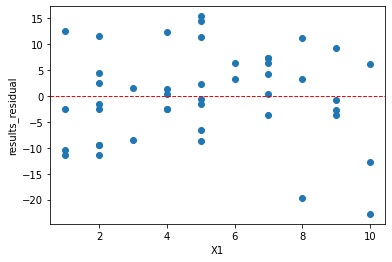

In [13]:
plt.scatter(df['X1'], results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X1")
plt.ylabel("results_residual")
plt.show()

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([-22.77232376, -19.70182768, -12.77232376, -11.49033943,
         -11.45509138, -10.45509138,  -9.49033943,  -9.49033943,
          -8.59608355,  -8.52558747,  -6.59608355,  -3.73707572,
          -3.66657963,  -2.73707572,  -2.56083551,  -2.56083551,
          -2.49033943,  -2.45509138,  -1.59608355,  -1.49033943,
       

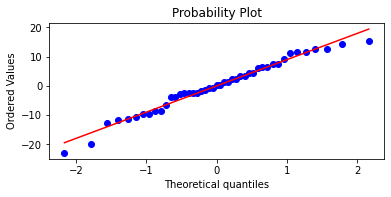

In [14]:
fig, ax = plt.subplots(figsize=(6,2.5))
stats.probplot(results_residual, dist='norm', plot=ax, fit=True)

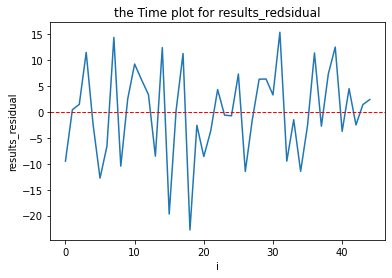

In [15]:
plt.plot(results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("i")
plt.ylabel("results_residual")
plt.title("the Time plot for results_redsidual")
plt.show()

In [16]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
BPtest_result = dict(zip(name, test))
BPtest_result

{'Lagrange multiplier statistic': 1.4186806143688113,
 'f p-value': 0.2432643478004854,
 'f-value': 1.3997572188686809,
 'p-value': 0.2336206895755433}

In [0]:
X2 = df['X2']
results_x2 = smf.ols('y ~ X2', data = df).fit()
results_x2_residual = results_x2.resid

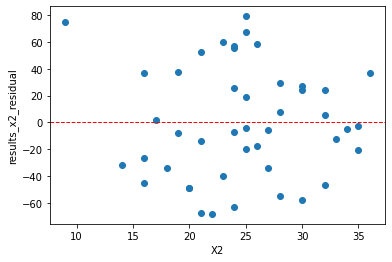

In [18]:
plt.scatter(df['X2'], results_x2_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X2")
plt.ylabel("results_x2_residual")
plt.show()

In [0]:
X3 = df['X3']
results_x3 = smf.ols('y ~ X3', data = df).fit()
results_x3_residual = results_x3.resid

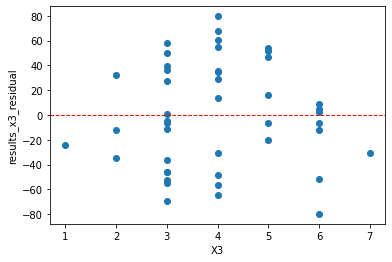

In [20]:
plt.scatter(df['X3'], results_x3_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X3")
plt.ylabel("results_x3_residual")
plt.show()